# 常用统计图汇总

本章节不涉及具体的统计学问题，也不涉及统计图的优雅展示，更不涉及真实的数据分析，仅作为使用 Python 来构造统计图的 demo 使用，让您大致清楚使用 Python 绘图的能力。

我认为傻瓜式的第一步是很重要的，很容易建立初学者对于新知识的信心。

在 Python 中，与统计绘图有关的库一般是 numpy pandas seaborn matplotlib scipy。而绘制每一张图，大致的步骤都是：先导入数据，然后绘制图像展示。

接下来，我们将一步步展示，如何用 Python 从 0-1 做到绘制常用统计图。

In [162]:
# 安装基础依赖库
!pip install matplotlib numpy pandas seaborn scipy

Looking in indexes: http://mirrors.aliyun.com/pypi/simple/


In [163]:
# Python 版本
!python --version
# 各个依赖库的版本
!pip list |grep matplotlib 
!pip list |grep numpy 
!pip list |grep pandas 
!pip list |grep seaborn
!pip list |grep scipy

Python 3.7.6
matplotlib             3.3.3              
numpy                  1.19.0             
pandas                 1.2.1              
seaborn                0.11.1             
scipy                  1.6.0              


### 折线图（以正弦函数为例）

In [155]:
import matplotlib.pyplot as plt
import numpy as np

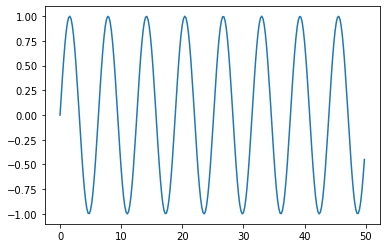

In [156]:
x = np.arange(0,50,0.2)
y = np.sin(x)
plt.plot(x,y)
plt.show()

### 多组数据复合折线图（以正余弦函数为例）

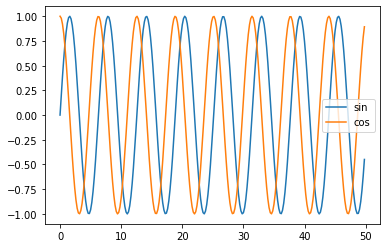

In [157]:
z = np.cos(x)

flg, axs = plt.subplots()

axs.plot(x, y, label="sin")
axs.plot(x, z, label="cos")

plt.legend()
plt.show()

### 散点图（以 500 个随机数为例）

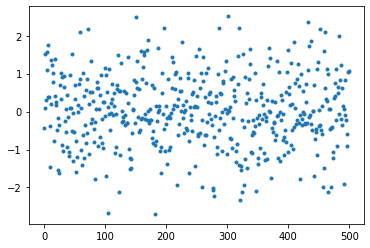

In [160]:
x = np.random.randn(500)
plt.plot(x,'.')
plt.show()

### 直方图

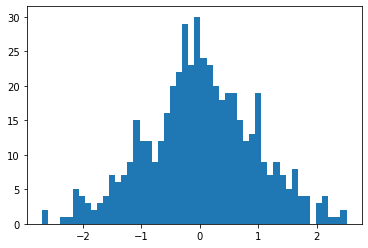

In [161]:
plt.hist(x,bins=50) # bins 指的是总数据分为几段
plt.show()

### 核密度估计图

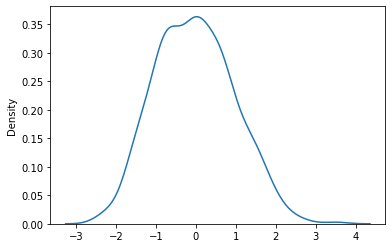

In [45]:
import seaborn as sns
sns.kdeplot(x)
plt.show()

### 累积频率

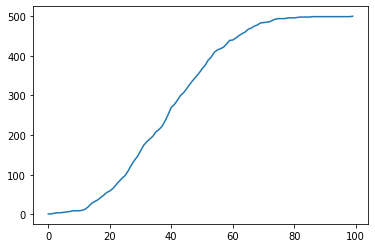

In [51]:
import scipy.stats as stats
plt.plot(stats.cumfreq(x,numbins=100)[0])
plt.show()

### 误差条图

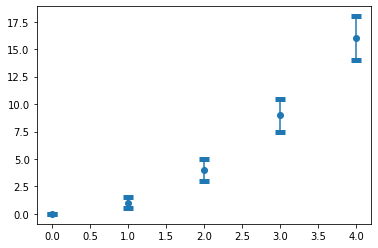

In [64]:
indexs = np.arange(5)
y = indexs**2
errorBar = indexs/2
plt.errorbar(indexs,y,yerr=errorBar,fmt='o',capsize=5,capthick=5)
plt.show()

### 箱形图

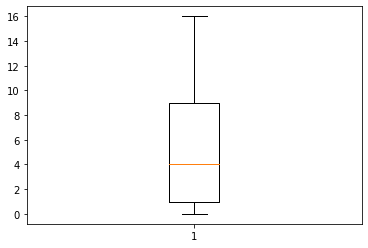

In [83]:
plt.boxplot(y, sym='*')
plt.show()

### 小提琴图

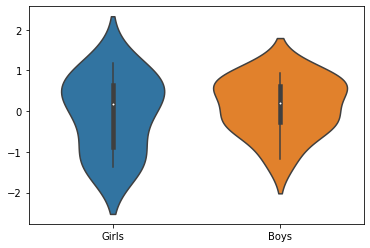

In [164]:
import pandas as pd
nd = stats.norm
data = nd.rvs(size=(10))

nd2 = stats.norm(loc = 3,scale = 1.5)
data2 = nd.rvs(size=(10))

df = pd.DataFrame({'Girls':data,'Boys':data2})

sns.violinplot(data=df)

plt.show()

### 分组的条形图

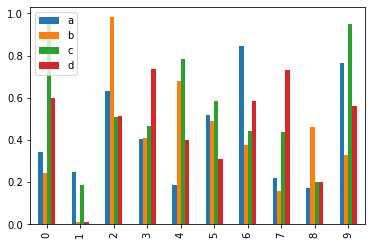

In [165]:
df = pd.DataFrame(np.random.rand(10,4),columns=['a','b','c','d'])
df.plot(kind='bar',grid=False)
plt.show()

In [166]:
df

,a,b,c,d
0,0.344273,0.245457,0.959911,0.600445
1,0.250278,0.010876,0.185026,0.013332
2,0.631093,0.980923,0.507743,0.513814
3,0.404055,0.409184,0.465090,0.735512
4,0.187971,0.677258,0.782196,0.399825
5,0.516106,0.489262,0.584248,0.309462
6,0.847015,0.376181,0.443419,0.582694
7,0.218859,0.158183,0.438027,0.732080
8,0.174346,0.462928,0.202488,0.201602
9,0.762531,0.327962,0.950136,0.559551


### 饼图

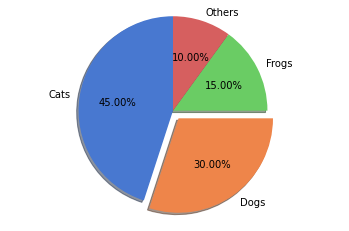

In [167]:
txtLabels = 'Cats', 'Dogs', 'Frogs', 'Others'
fractions = [45, 30, 15, 10]
offsets = (0, 0.1, 0, 0)
plt.pie(fractions, explode=offsets, 
        labels=txtLabels, autopct='%1.2f%%', shadow=True, startangle=90,colors=sns.color_palette('muted'))

plt.axis('equal')

plt.show()

### 二元变量散点图

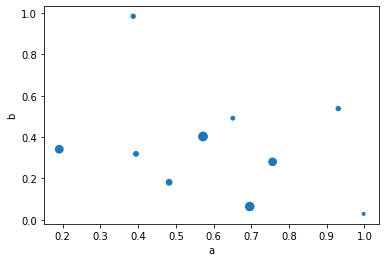

In [168]:
df2 = pd.DataFrame(np.random.rand(10, 4), columns=['a', 'b', 'c', 'd'])
df2['c'] = df2['c']*100
df2.plot(kind='scatter', x='a', y='b', s='c')
plt.show()

In [169]:
df2

,a,b,c,d
0,0.482025,0.180980,33.728006,0.986353
1,0.756409,0.280074,58.701932,0.658454
2,0.930322,0.537960,19.037795,0.451985
3,0.650956,0.491370,14.831098,0.588071
4,0.190939,0.341160,60.589825,0.072932
5,0.394265,0.318630,23.542744,0.902979
6,0.571934,0.402720,77.193606,0.010298
7,0.997779,0.027907,8.514587,0.069987
8,0.695713,0.063790,72.193040,0.778164
9,0.386831,0.984970,18.305286,0.149969


### 3D 图

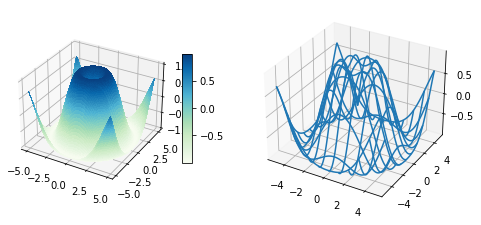

In [179]:
from matplotlib import cm

fig = plt.figure(figsize=plt.figaspect(0.5))

xv = np.arange(-5,5,0.1)
yv = np.arange(-5,5,0.1)

xv,yv = np.meshgrid(xv,yv)

rv = np.sqrt(xv**2 + yv**2)
zv = np.sin(rv)

ax = fig.add_subplot(1, 2, 1, projection='3d')
surf = ax.plot_surface(xv, yv, zv, rstride=1, cstride=1, cmap=cm.GnBu, linewidth=0, antialiased=False)
ax.set_zlim3d(-1.01, 1.01)
fig.colorbar(surf, shrink=0.5, aspect=10)

ax = fig.add_subplot(1, 2, 2, projection='3d')
ax.plot_wireframe(xv, yv, zv,rstride=10,cstride=10)

plt.show()